In [1]:
#install library and download webdriver
import cv2
import pytesseract
import easyocr
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import time
from datetime import datetime as dt
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',options=options)

In [2]:
url = 'https://corona.riau.go.id/pekanbaru/'
driver.get(url)
time.sleep(3)
content = driver.page_source
soup = BeautifulSoup(content, "html.parser")
div = str(soup.find('div', class_='elementor-shortcode').img['src'])

In [3]:
from PIL import Image
import requests

pil_image = Image.open(requests.get(div, stream=True).raw)

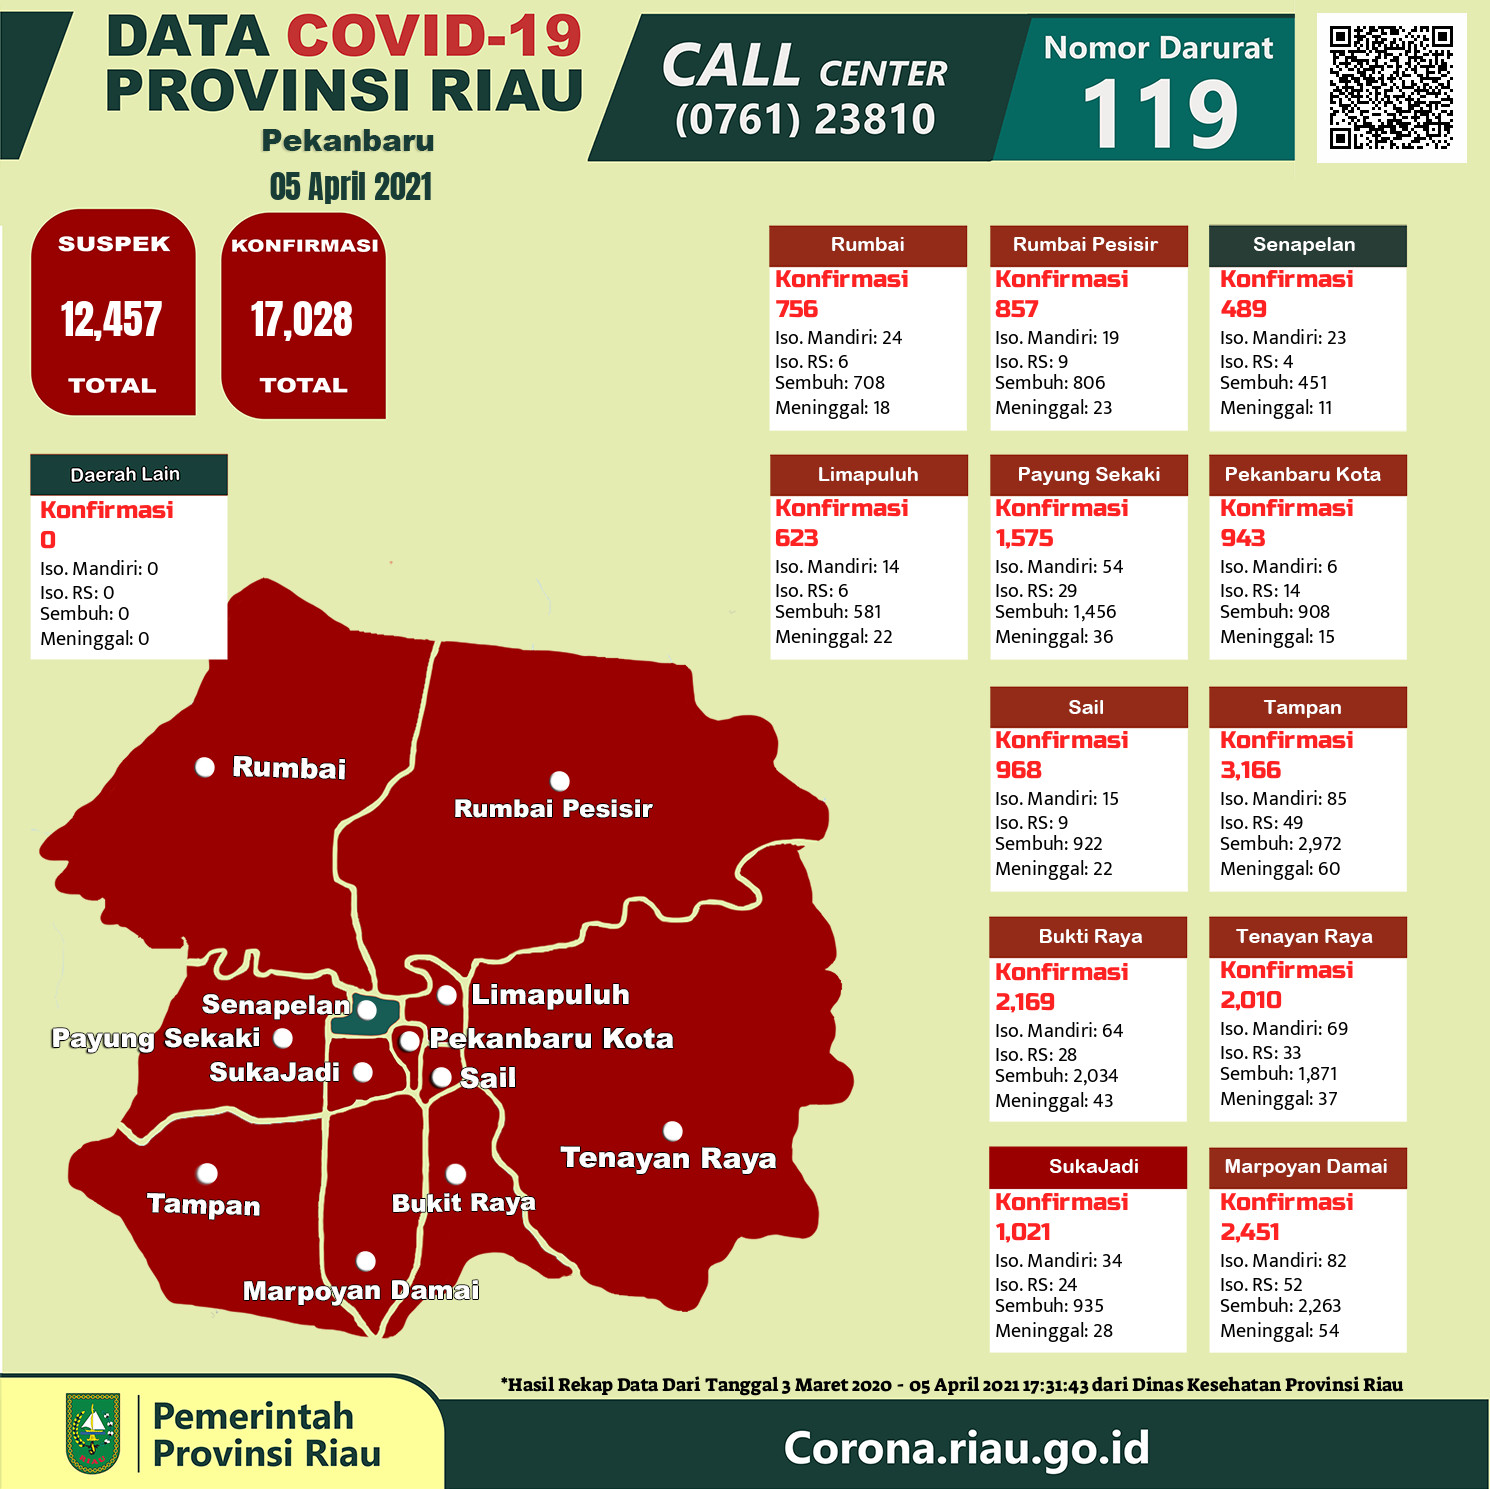

In [4]:
pil_image

In [5]:
# Crop the iceberg portion
gambar_data = pil_image.crop((700,230,1450,1370))
gambar_tanggal = pil_image.crop((250,155,450,210))

In [6]:
gambar_data = gambar_data.save("data_pekanbaru.jpg")
gambar_tanggal = gambar_tanggal.save('tanggal_pekanbaru.jpg')

In [7]:
reader = easyocr.Reader(['id','en'], gpu=False)
result_1 = reader.readtext('data_pekanbaru.jpg')
result_2 = reader.readtext('tanggal_pekanbaru.jpg')

Using CPU. Note: This module is much faster with a GPU.


In [8]:
data = []
for i in range(len(result_1)):
    data.append(result_1[i][1])

In [9]:
unwanted = {'Konfirmasi', 'Raya'}
list1 = [ele for ele in data if ele not in unwanted]

In [10]:
dic = {'Bukti':'Bukti Raya'}
list1 = [dic.get(n, n) for n in list1]

In [11]:
list1

['Rumbai',
 'Rumbai Pesisir',
 'Senapelan',
 '756',
 '857',
 '489',
 'Iso. Mandiri: 24',
 'Iso. Mandiri: 19',
 'Iso. Mandiri: 23',
 'Iso. RS: 6',
 'Iso. RS: 9',
 'Iso. RS: 4',
 'Sembuh: 708',
 'Sembuh: 806',
 'Sembuh: 451',
 'Meninggal: 18',
 'Meninggal: 23',
 'Meninggal: 11',
 'Limapuluh',
 'Payung Sekaki',
 'Pekanbaru Kota',
 '623',
 '1,575',
 '943',
 'Iso. Mandiri: 14',
 'Iso. Mandiri: 54',
 'Iso. Mandiri: 6',
 'Iso. RS: 6',
 'Iso. RS: 29',
 'Iso. RS: 14',
 'Sembuh: 581',
 'Sembuh: 1,456',
 'Sembuh: 908',
 'Meninggal: 22',
 'Meninggal: 36',
 'Meninggal: 15',
 'Sail',
 'Tampan',
 '968',
 '3,166',
 'Iso. Mandiri: 15',
 'Iso. Mandiri: 85',
 'Iso. RS: 9',
 'Iso. RS: 49',
 'Sembuh: 922',
 'Sembuh: 2,972',
 'Meninggal: 22',
 'Meninggal: 60',
 'Bukti Raya',
 'Tenayan Raya',
 '2,169',
 '2,010',
 'Iso. Mandiri: 64',
 'Iso. Mandiri: 69',
 'Iso. RS: 28',
 'Iso. RS: 33',
 'Sembuh: 2,034',
 'Sembuh: 1,871',
 'Meninggal: 43',
 'Meninggal: 37',
 'SukaJadi',
 'Marpoyan Damai',
 '1,021',
 '2,451',
 

In [12]:
n = 3
hasil1 = [list1[i:i + n] for i in range(0, 36, n)]

In [13]:
n = 2
hasil2 = [list1[i:i + n] for i in range(36, len(list1), n)]

In [14]:
hasil3 = []
for i in range(len(hasil1)):
  jumlah = hasil1[i] +hasil2[i]
  hasil3.append(jumlah)

In [15]:
kecamatan = []
total_positif = []
positif_isolasi = []
positif_dirawat = []
positif_sembuh = []
positif_meninggal = []

for i in range(len(hasil3)):
  if i in range(0, len(hasil3), 6):
    kecamatan = kecamatan + hasil3[i]
  if i in range(1, len(hasil3), 6):
    total_positif = total_positif + hasil3[i]
  if i in range(2, len(hasil3), 6):
    positif_isolasi = positif_isolasi + hasil3[i]
  if i in range(3, len(hasil3), 6):
    positif_dirawat = positif_dirawat + hasil3[i]
  if i in range(4, len(hasil3), 6):
    positif_sembuh = positif_sembuh + hasil3[i]
  if i in range(5, len(hasil3), 6):
    positif_meninggal = positif_meninggal + hasil3[i]

In [16]:
for i in range(len(hasil2)):
  if i in range(12, len(hasil2), 6):
    kecamatan = kecamatan + hasil2[i]
  if i in range(13, len(hasil2), 6):
    total_positif = total_positif + hasil2[i]
  if i in range(14, len(hasil2), 6):
    positif_isolasi = positif_isolasi + hasil2[i]
  if i in range(15, len(hasil2), 6):
    positif_dirawat = positif_dirawat + hasil2[i]
  if i in range(16, len(hasil2), 6):
    positif_sembuh = positif_sembuh + hasil2[i]
  if i in range(17, len(hasil2), 6):
    positif_meninggal = positif_meninggal + hasil2[i]

In [17]:
for i in range(len(positif_isolasi)):
  if 'Iso. Mandiri:' in positif_isolasi[i]:
    positif_isolasi[i] = positif_isolasi[i][14:]

for i in range(len(positif_dirawat)):
  if 'Iso. RS:' in positif_dirawat[i]:
    positif_dirawat[i] = positif_dirawat[i][9:]

for i in range(len(positif_sembuh)):
  if 'Sembuh:' in positif_sembuh[i]:
    positif_sembuh[i] = positif_sembuh[i][8:]

for i in range(len(positif_meninggal)):
  if 'Meninggal:' in positif_meninggal[i]:
    positif_meninggal[i] = positif_meninggal[i][11:]

In [18]:
#find time and date
tanggal = list(result_2[0])
tanggal = tanggal[1].split()
bulan = ['januari', 'februari', 'maret', 'april', 'mei', 'juni','juli','agustus', 'september', 'oktober','november','desember']
bln = bulan.index(tanggal[1].lower())+1
tanggal_update = tanggal[2]+'-'+str(bln)+'-'+tanggal[0]
dates = dt.strptime(tanggal_update, '%Y-%m-%d').strftime('%Y-%m-%d')

now = dt.now().strftime('%Y-%m-%d')

In [19]:
#create table
df = pd.DataFrame()
df['kecamatan'] = kecamatan
df['total_positif'] = total_positif
df['positif_sembuh'] = positif_sembuh
df['positif_dirawat'] = positif_dirawat
df['positif_isolasi'] = positif_isolasi
df['positif_meninggal'] = positif_meninggal
df.insert(0, column='scrape_date', value=now)
df.insert(1, column='date_update', value=dates)
df.insert(2, column='provinsi', value='Riau')
df.insert(3, column='kabkot', value='Kota Pekanbaru')
df.insert(5, column='kelurahan', value='')
df.insert(6, column='total_odp', value='')
df.insert(7, column='total_pdp', value='')
df.insert(13, column='source_link', value=url)
df.insert(14, column='types', value='kecamatan')
df.insert(15, column='user_pic', value='Muslar')

In [20]:
df

,scrape_date,date_update,provinsi,kabkot,kecamatan,kelurahan,total_odp,total_pdp,total_positif,positif_sembuh,positif_dirawat,positif_isolasi,positif_meninggal,source_link,types,user_pic
0,2021-09-03,2021-04-05,Riau,Kota Pekanbaru,Rumbai,,,,756,708,6,24,18,https://corona.riau.go.id/pekanbaru/,kecamatan,Muslar
1,2021-09-03,2021-04-05,Riau,Kota Pekanbaru,Rumbai Pesisir,,,,857,806,9,19,23,https://corona.riau.go.id/pekanbaru/,kecamatan,Muslar
2,2021-09-03,2021-04-05,Riau,Kota Pekanbaru,Senapelan,,,,489,451,4,23,11,https://corona.riau.go.id/pekanbaru/,kecamatan,Muslar
3,2021-09-03,2021-04-05,Riau,Kota Pekanbaru,Sail,,,,968,922,9,15,22,https://corona.riau.go.id/pekanbaru/,kecamatan,Muslar
4,2021-09-03,2021-04-05,Riau,Kota Pekanbaru,Tampan,,,,"3,166","2,972",49,85,60,https://corona.riau.go.id/pekanbaru/,kecamatan,Muslar
5,2021-09-03,2021-04-05,Riau,Kota Pekanbaru,Limapuluh,,,,623,581,6,14,22,https://corona.riau.go.id/pekanbaru/,kecamatan,Muslar
6,2021-09-03,2021-04-05,Riau,Kota Pekanbaru,Payung Sekaki,,,,"1,575","1,456",29,54,36,https://corona.riau.go.id/pekanbaru/,kecamatan,Muslar
7,2021-09-03,2021-04-05,Riau,Kota Pekanbaru,Pekanbaru Kota,,,,943,908,14,6,15,https://corona.riau.go.id/pekanbaru/,kecamatan,Muslar
8,2021-09-03,2021-04-05,Riau,Kota Pekanbaru,Bukti Raya,,,,"2,169","2,034",28,64,43,https://corona.riau.go.id/pekanbaru/,kecamatan,Muslar
9,2021-09-03,2021-04-05,Riau,Kota Pekanbaru,Tenayan Raya,,,,"2,010","1,871",33,69,37,https://corona.riau.go.id/pekanbaru/,kecamatan,Muslar
